In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import itertools
import community as community_louvain
import matplotlib.cm as cm
import torch
import warnings
warnings.filterwarnings('ignore')

### DBLP

In [2]:
path = 'syn_vae/dblp/'

In [3]:
def plot_graph(G):

    color_class_map = {0: 'blue', 1: 'red', 2: 'darkgreen', 3: 'orange'}
            
    nx.draw(G, 
        with_labels=False, node_color=[color_class_map[node[1]['class']] 
                        for node in G.nodes(data=True)], 
            node_size=200,
        font_color='white')
    plt.show() 

In [4]:
def plot_partition(G,partition):
    # draw the graph
    pos = nx.spring_layout(G)
    # color the nodes according to their partition
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,label=True,
                            cmap=cmap, node_color=list(partition.values()))
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

In [5]:
def detect_community(G):
    partition = community_louvain.best_partition(G)
    plot_partition(G,partition)

Graph of 10 nodes

In [6]:
G10 = nx.read_gexf(path + 'sync2261225153_G10.gexf')
node_class_syn = torch.load(path + 'sync2261225153_node_class10.pt').detach().numpy()
node_class_syn

array([1, 2, 0, 0, 3, 1, 3, 1, 3, 2])

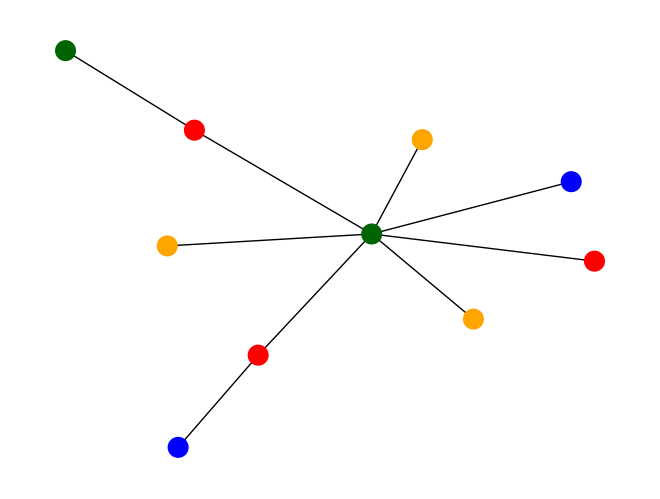

In [7]:
nx.set_node_attributes(G10, dict(zip(G10.nodes(), node_class_syn)), 'class')
plot_graph(G10)

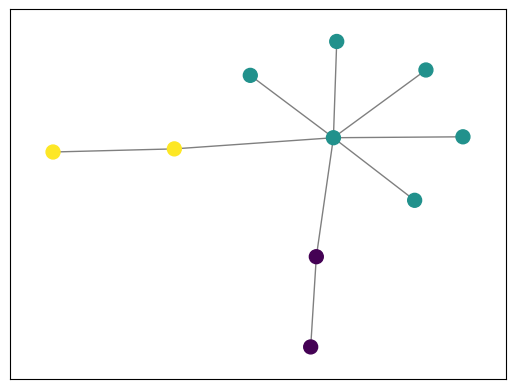

[{'0', '9'}, {'1', '2', '3', '4', '5', '7'}, {'6', '8'}]

In [8]:
detect_community(G10)
list_com= nx.community.louvain_communities(G10, seed=123)
list_com

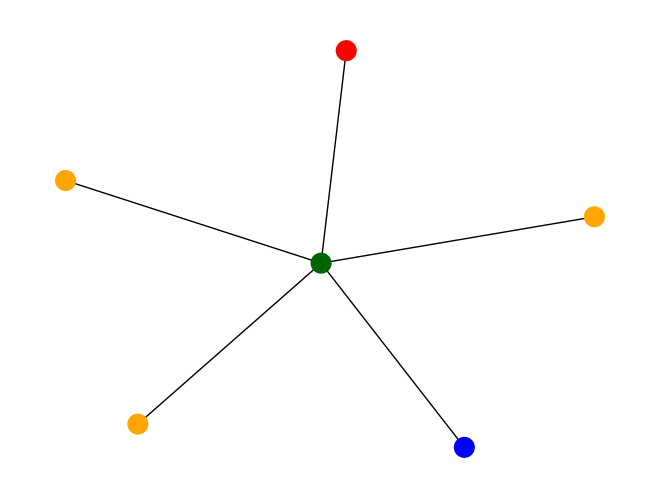

In [9]:
#Largest substructure
H = G10.subgraph(max(list_com, key=len))
plot_graph(H)

Graph of 15 nodes

In [10]:
G15 = nx.read_gexf(path + 'sync41833225214_G15.gexf')
node_class_syn = torch.load(path + 'sync41833225214_node_class15.pt').detach().numpy()
node_class_syn

array([2, 2, 1, 3, 2, 2, 2, 0, 3, 3, 1, 3, 0, 3, 3])

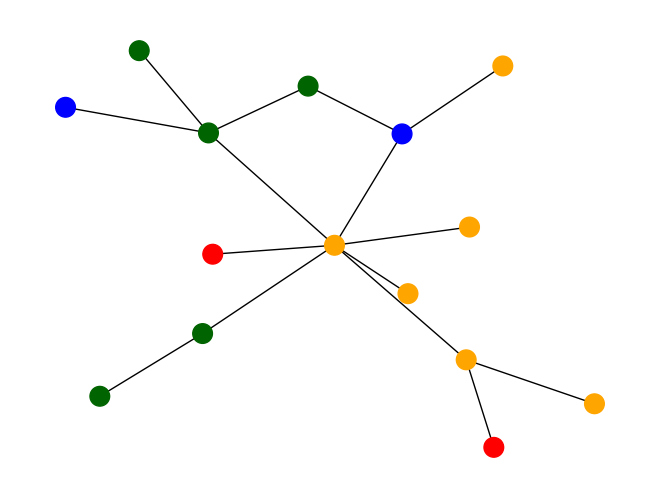

In [11]:
nx.set_node_attributes(G15, dict(zip(G15.nodes(), node_class_syn)), 'class')
plot_graph(G15)

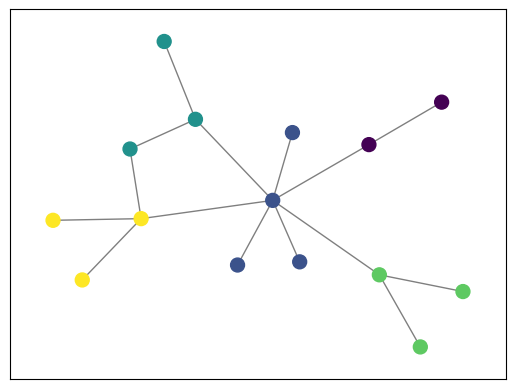

[{'0', '8'},
 {'1', '4', '5'},
 {'13', '2', '3'},
 {'11', '6', '7', '9'},
 {'10', '12', '14'}]

In [12]:
detect_community(G15)
list_com= nx.community.louvain_communities(G15, seed=123)
list_com

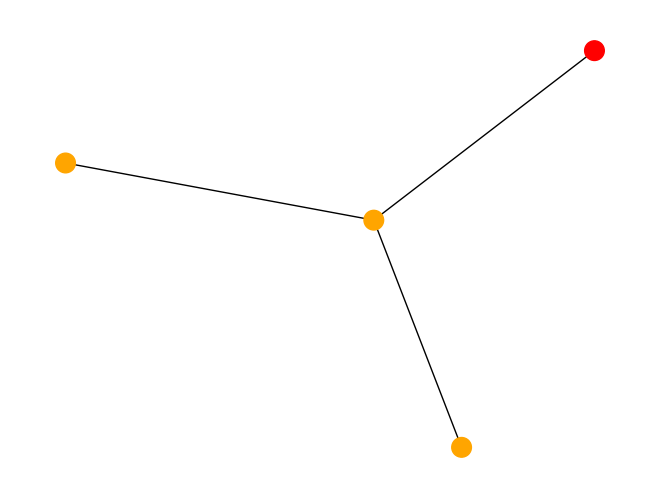

In [13]:
#Largest substructure
H = G15.subgraph(max(list_com, key=len))
plot_graph(H)

Graph of 20 nodes

In [14]:
G20 = nx.read_gexf(path + 'sync20325225316_G20.gexf')
node_class_syn = torch.load(path + 'sync20325225316_node_class20.pt').detach().numpy()
node_class_syn

array([3, 3, 3, 3, 1, 2, 1, 3, 0, 2, 0, 2, 2, 2, 3, 3, 0, 3, 3, 2])

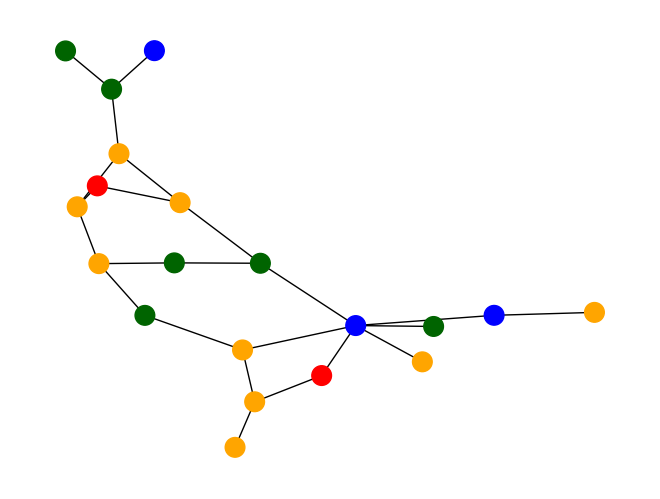

In [15]:
nx.set_node_attributes(G20, dict(zip(G20.nodes(), node_class_syn)), 'class')
plot_graph(G20)

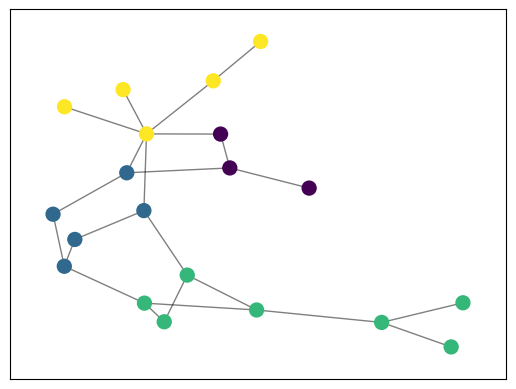

[{'14', '19', '3', '6', '7'},
 {'10', '12', '13', '17', '18', '21', '4'},
 {'11', '15', '16', '23', '9'},
 {'20', '24', '8'}]

In [16]:
detect_community(G20)
list_com= nx.community.louvain_communities(G20, seed=123)
list_com

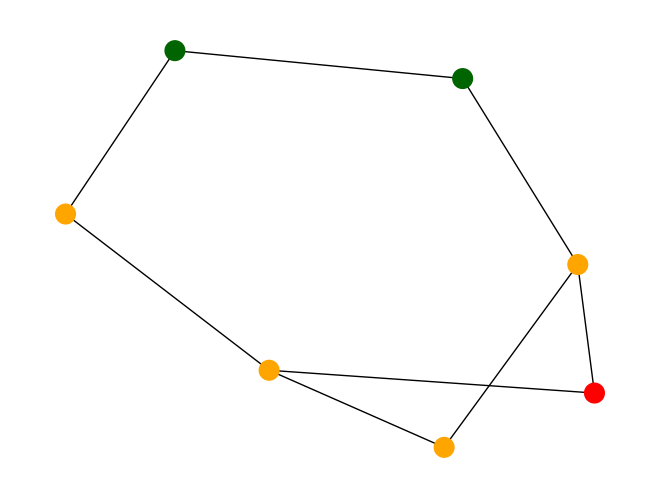

In [17]:
#Largest substructure
H = G20.subgraph(max(list_com, key=len))
plot_graph(H)

In [18]:
# G25 = nx.read_gexf(path + 'graph_19.gexf')
# plot_graph(G25)

In [19]:
# detect_community(G25)
# list_com= nx.community.louvain_communities(G25, seed=123)
# list_com

In [20]:
# H = G25.subgraph(max(list_com, key=len))
# plot_graph(H)

Graph of 30 nodes

In [21]:
G30 = nx.read_gexf(path + 'sync41798225413_G30.gexf')
node_class_syn = torch.load(path + 'sync41798225413_node_class30.pt').detach().numpy()
nx.set_node_attributes(G30, dict(zip(G30.nodes(), node_class_syn)), 'class')
node_class_syn

array([3, 1, 1, 2, 1, 2, 3, 3, 1, 2, 3, 0, 2, 3, 3, 2, 2, 1, 0, 0, 1, 2,
       3, 0, 3, 3, 3, 1, 2, 2])

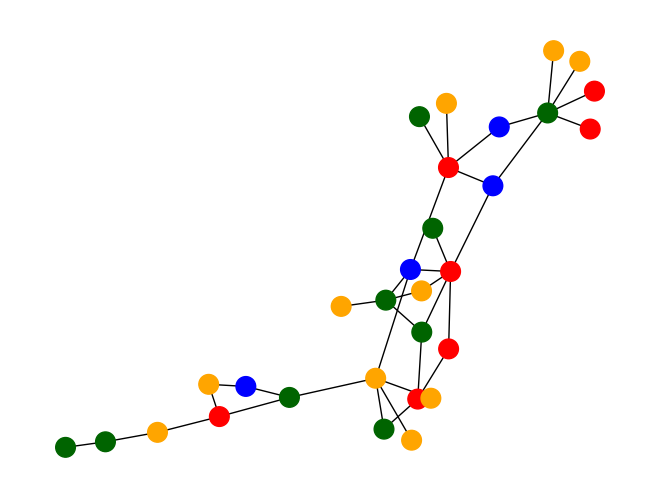

In [22]:
plot_graph(G30)

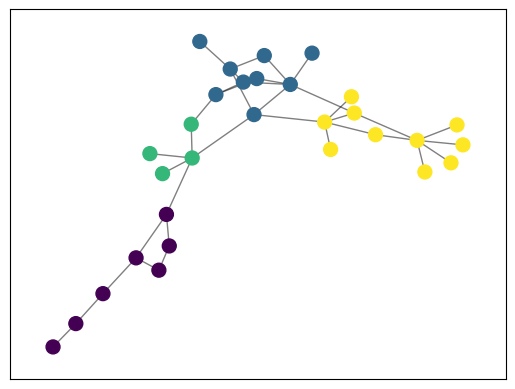

[{'14', '29', '3', '34'},
 {'1', '10', '11', '12', '21', '25', '26', '4', '6', '8'},
 {'17', '19', '20', '27', '31', '7', '9'},
 {'13', '15', '16', '18', '2', '23', '24', '30', '33'}]

In [23]:
detect_community(G30)
list_com= nx.community.louvain_communities(G30, seed=123)
list_com

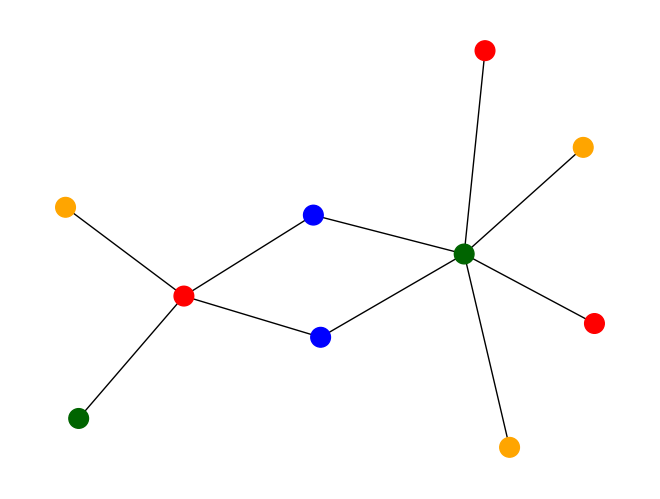

In [24]:
H = G30.subgraph(max(list_com, key=len))
plot_graph(H)